In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import preprocessing
# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


## Ubah format data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')
df.dtypes

Unnamed: 0                      int64
ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain    

## Isi nilai kosong

In [5]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Income'] = df['Income'].fillna((df['Income'].median()))
df.isna().sum()

Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# ingin mencari jumlah orang dalam keluarga kustomer
def parentot (parent):
    if parent == 'Lajang':
        return 1
    elif parent == 'Bertunangan':
        return 2
    elif parent == 'Menikah':
        return 2
    elif  parent == 'Cerai':
        return 1
    else:
        return 1
#apply
df['parentot'] = df['Marital_Status'].apply(parentot)
df['parentot'].head(3)

0    1
1    1
2    2
Name: parentot, dtype: int64

## Feature Engineering

In [8]:
#total campaign accepted
df['AcceptedCmptot'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5']

#total purchase
df['Purctot'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

#consumetot
df['Contot'] = df['MntCoke'] + df['MntFruits'] + df['MntFishProducts'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

#Age : this year (example 2014) - Year birth
df['Age'] = 2014 - df['Year_Birth'] 

#conversion rate
df['converate'] = df['Response'] / df['NumWebVisitsMonth'] 

#customer month (berapa bulan jadi kustomer)
df['Customer_Months'] = (pd.to_datetime("2014-12-31") - pd.to_datetime(df['Dt_Customer'])) // np.timedelta64(1,'M')

#child total
df['child'] = df['Kidhome'] + df['Teenhome']

#jumlah orang di keluarga
df['peopletot'] = df['child'] + df['parentot']

display(df.head(3))
print('')
display(df.tail(3))

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,parentot,AcceptedCmptot,Purctot,Contot,Age,converate,Customer_Months,child,peopletot
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,...,1,1,0,25,1617000,57,0.142857,32,0,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,...,0,1,0,6,27000,60,0.000000,4,2,3
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,...,0,2,0,21,776000,49,0.000000,16,0,2


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Response,parentot,AcceptedCmptot,Purctot,Contot,Age,converate,Customer_Months,child,peopletot
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,...,0,1,1,19,1241000,33,0.000000,11,0,1
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,...,0,2,0,23,843000,58,0.000000,11,1,3
2239,2239,9405,1954,S3,Menikah,52869000.0,1,1,2012-10-15,40,...,1,2,0,11,172000,60,0.142857,26,2,4


In [9]:
df['converate'] = df['converate'].fillna((df['converate'].median()))

## membuang kolom yang tidak diperlukan

In [10]:
df = df.drop('AcceptedCmp5', axis = 1)
df = df.drop('AcceptedCmp4', axis = 1)
df = df.drop('AcceptedCmp3', axis = 1)
df = df.drop('AcceptedCmp2', axis = 1)
df = df.drop('AcceptedCmp1', axis = 1)
df = df.drop('Kidhome', axis = 1)
df = df.drop('Teenhome', axis = 1)
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'parentot',
       'AcceptedCmptot', 'Purctot', 'Contot', 'Age', 'converate',
       'Customer_Months', 'child', 'peopletot'],
      dtype='object')

In [11]:
df['Education'].unique()

array(['S1', 'S3', 'S2', 'SMA', 'D3'], dtype=object)

In [12]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [13]:
demographic = ['Income', 'Age', 'child', 'Recency', 'Customer_Months', 'AcceptedCmptot', 'Response', 'converate']
spent = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Contot']
purchase = ['Purctot', 'NumWebVisitsMonth']

In [14]:
df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Contot']]

,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Contot
0,635000,88000,546000,172000,88000,88000,1617000
1,11000,1000,6000,2000,1000,6000,27000
2,426000,49000,127000,111000,21000,42000,776000
3,11000,4000,20000,10000,3000,5000,53000
4,173000,43000,118000,46000,27000,15000,422000
...,...,...,...,...,...,...,...
2235,709000,43000,182000,42000,118000,247000,1341000
2236,406000,0,30000,0,0,8000,444000
2237,908000,48000,217000,32000,12000,24000,1241000
2238,428000,30000,214000,80000,30000,61000,843000


In [15]:
# To drop duplicates and modify the existing DataFrame in place
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           2240 non-null   int64         
 1   ID                   2240 non-null   int64         
 2   Year_Birth           2240 non-null   int64         
 3   Education            2240 non-null   object        
 4   Marital_Status       2240 non-null   object        
 5   Income               2240 non-null   float64       
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntCoke              2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

## Handle Outlier

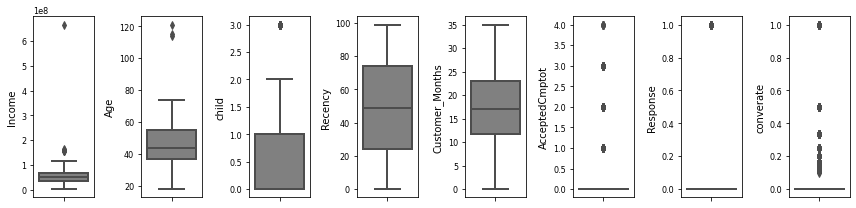

In [16]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic)):
    plt.subplot(1, len(demographic), i+1)
    sns.boxplot(y=df[demographic[i]], color='grey', orient='v')
    plt.tight_layout()

In [17]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [18]:
low, high = outlier(df['Income'])
low2, high2 = outlier(df['Age'])

In [19]:
#replacing outlier with upper bound and lower bound value
df['Income'] = np.where(df['Income']>high, high, df['Income'])
df['Income'] = np.where(df['Income']<low, low, df['Income'])
df['Age'] = np.where(df['Age']>high2, high2, df['Age'])
df['Age'] = np.where(df['Age']<low2, low2, df['Age'])

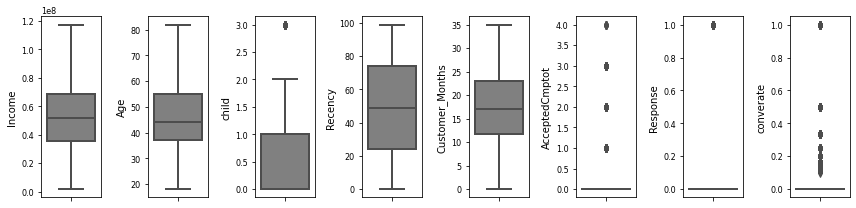

In [20]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic)):
    plt.subplot(1, len(demographic), i+1)
    sns.boxplot(y=df[demographic[i]], color='grey', orient='v')
    plt.tight_layout()

## Sebaran data

### Konsumsi

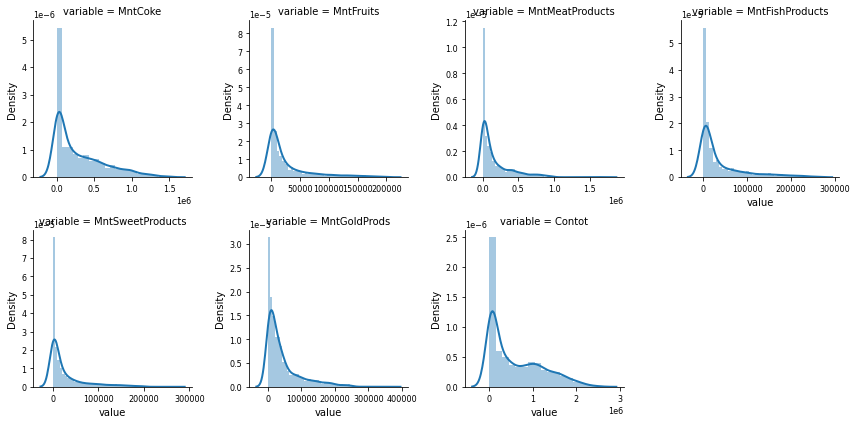

In [21]:
#Analisis Untuk Amount Spent dari customer untuk setiap produk 
df1 = pd.DataFrame(data=df, columns=['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Contot'])
nd = pd.melt(df1, value_vars =df1 )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1
plt.show()

### Pembelian

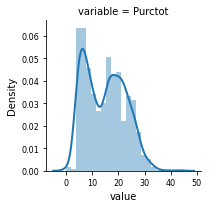

In [22]:
##Analisis NumPurchases atau pembelian setiap customer yang telah berbelanja.
df2 = pd.DataFrame(data=df, columns=['Purctot'])
nd = pd.melt(df2, value_vars =df2 )
n2 = sns.FacetGrid (nd, col='variable', sharex=False, sharey = False)
n2 = n2.map(sns.distplot, 'value')
n2
plt.show()

### Conversion Rate

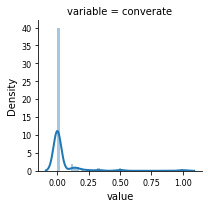

In [23]:
##Analisis NumPurchases atau pembelian setiap customer yang telah berbelanja.
df2 = pd.DataFrame(data=df, columns=['converate'])
nd = pd.melt(df2, value_vars =df2 )
n2 = sns.FacetGrid (nd, col='variable', sharex=False, sharey = False)
n2 = n2.map(sns.distplot, 'value')
n2
plt.show()

## Visualisasi

### Hubungan antara Accepted Campaign dengan Jenjang Pendidikan

In [24]:
# Mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" serta menghitung jumlah ID
df2 = df.groupby(['AcceptedCmptot', 'Education'])['ID'].count().unstack().fillna(0)
df2

Education,D3,S1,S2,S3,SMA
AcceptedCmptot,,,,,
0,165.0,897.0,295.0,372.0,48.0
1,28.0,159.0,55.0,77.0,6.0
2,7.0,37.0,13.0,26.0,0.0
3,3.0,26.0,6.0,9.0,0.0
4,0.0,8.0,1.0,2.0,0.0


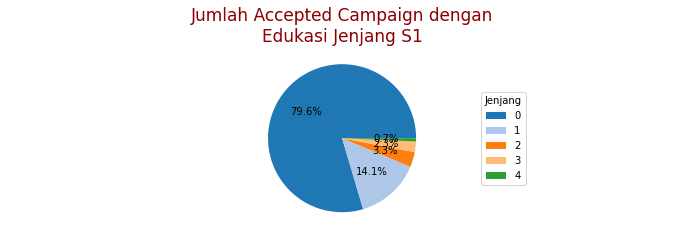

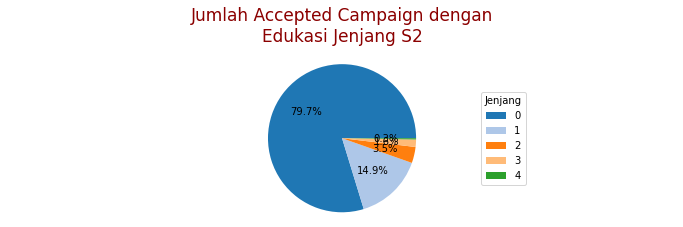

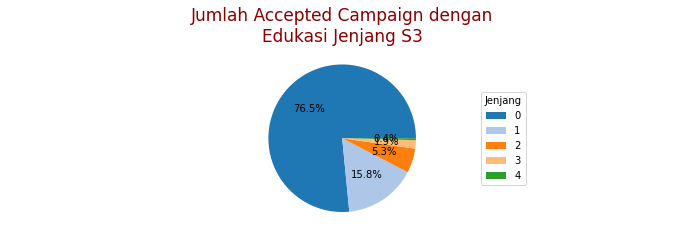

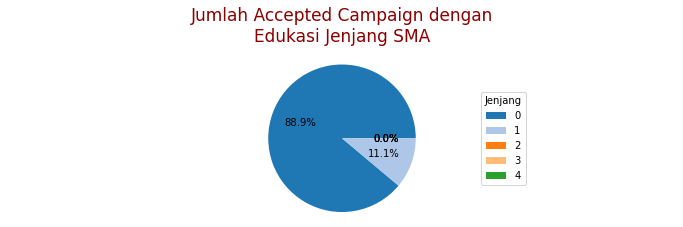

In [25]:
colors = plt.cm.tab20.colors


# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in df2.columns[1:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(df2[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Jumlah Accepted Campaign dengan\nEdukasi Jenjang {col}', fontsize=17, pad=15, color = 'darkred')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               df2[col].index, 
               title='Jenjang', 
               loc='center left', 
               bbox_to_anchor=(0.7, 0, 0.5, 1))
    plt.show()


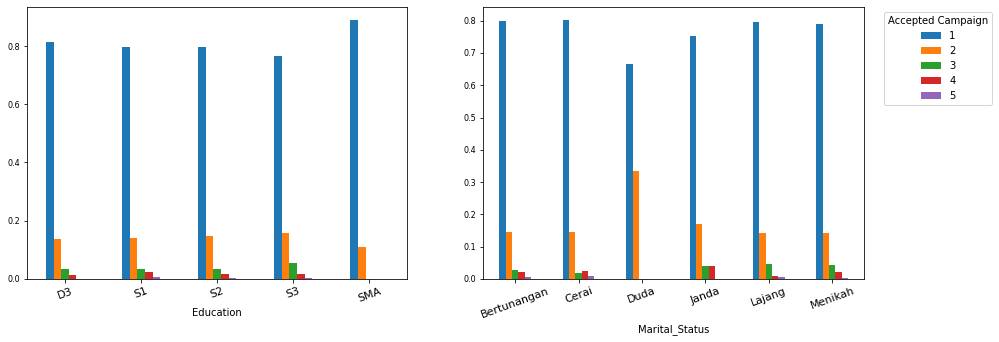

In [26]:
byEducation = df.groupby('Education').AcceptedCmptot.value_counts(normalize=True)
byMarital = df.groupby('Marital_Status').AcceptedCmptot.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
g1 = byEducation.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byMarital.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=20, fontsize=11)

plt.legend(labels = ['1', '2', '3', "4", '5'], fontsize = 10, title = "Accepted Campaign", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

### Hubungan antara Banyak Response dengan Jenjang Pendidikan

In [27]:
# Mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" serta menghitung jumlah ID
df3 = df.groupby(['Response', 'Education'])['ID'].count().unstack().fillna(0)
df3

Education,D3,S1,S2,S3,SMA
Response,,,,,
0,181,975,313,385,52
1,22,152,57,101,2


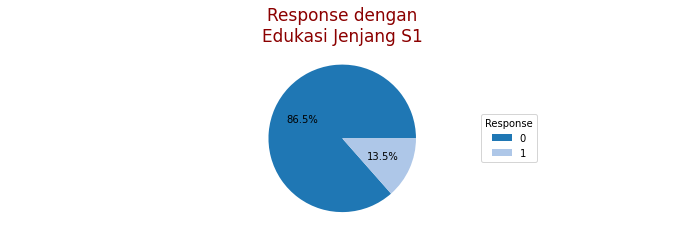

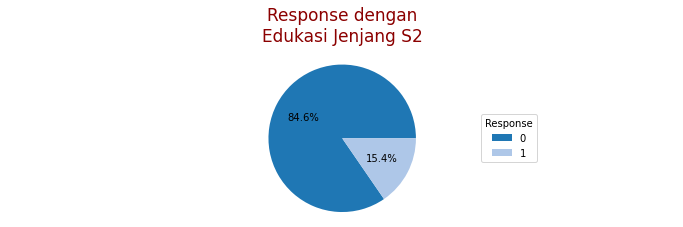

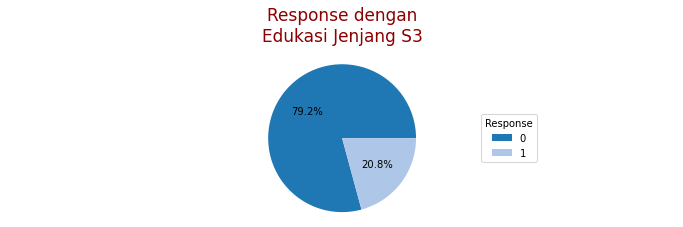

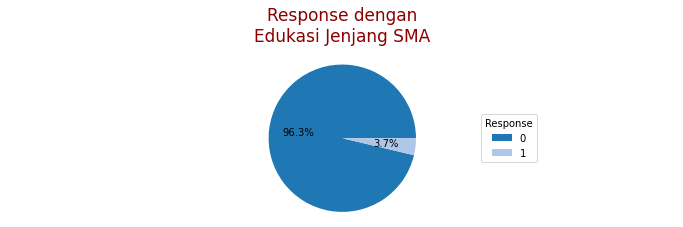

In [28]:
colors = plt.cm.tab20.colors


# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in df3.columns[1:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(df3[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Response dengan\nEdukasi Jenjang {col}', fontsize=17, pad=15, color = 'darkred')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               df3[col].index, 
               title='Response', 
               loc='center left', 
               bbox_to_anchor=(0.7, 0, 0.5, 1))
    plt.show()

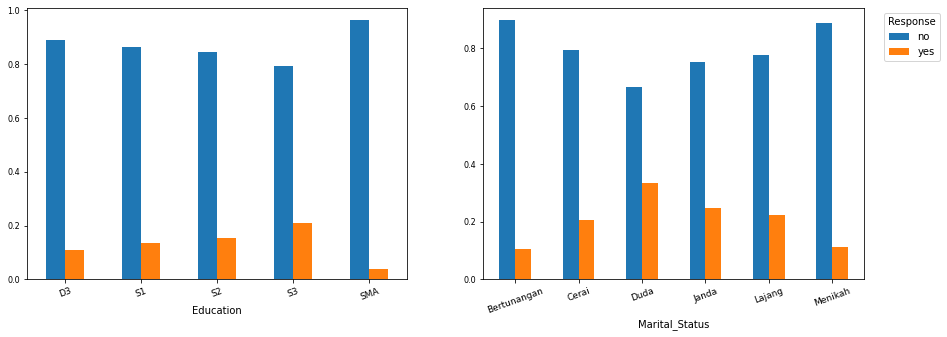

In [29]:
byEducation = df.groupby('Education').Response.value_counts(normalize=True)
byMarital = df.groupby('Marital_Status').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
g1 = byEducation.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byMarital.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=20, fontsize=9)

plt.legend(labels = ["no", "yes"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

### Korelasi

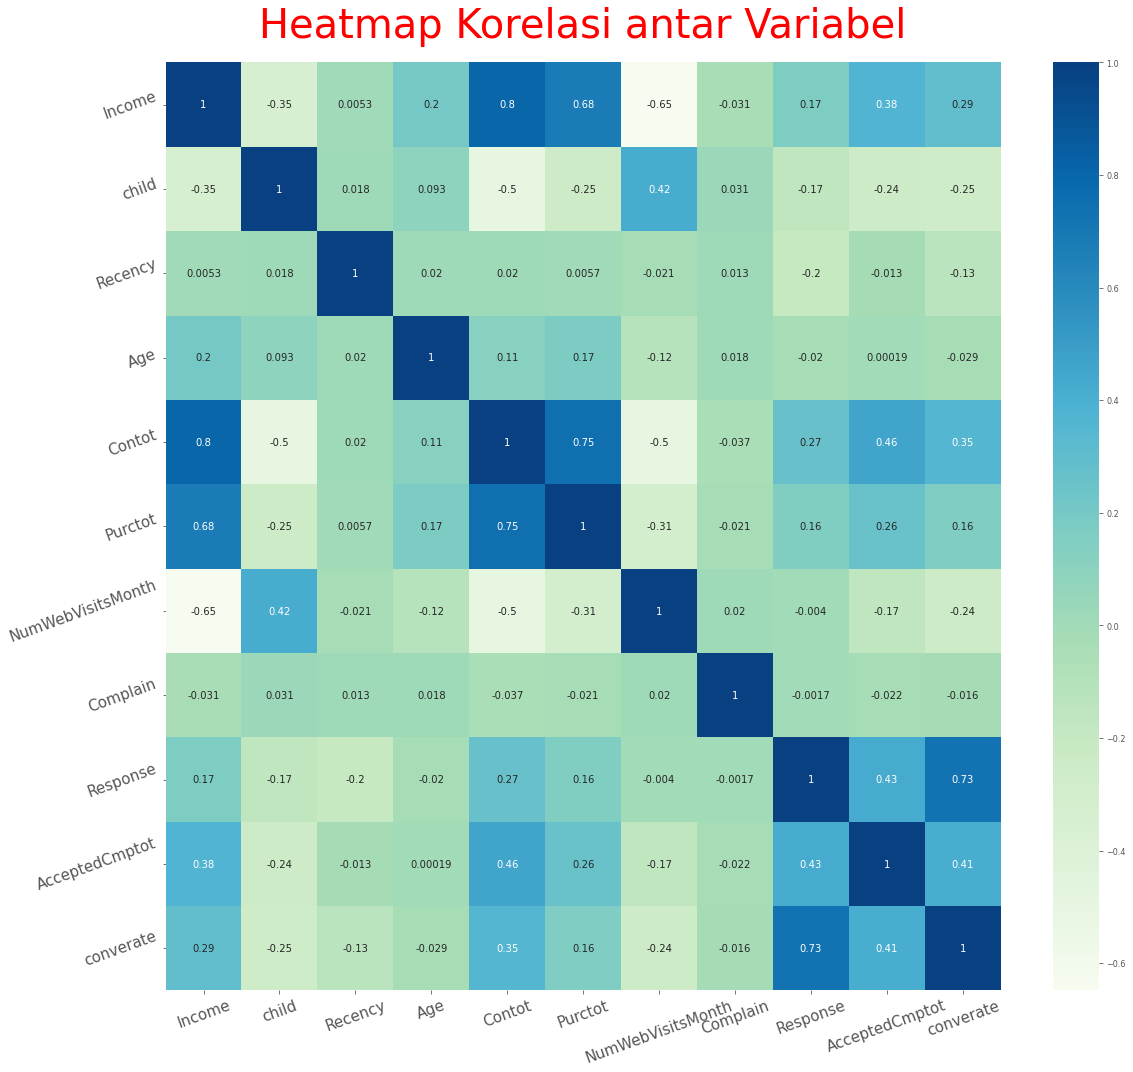

In [30]:
 #heatmap korelasi masing-masing variabelnya
plt.figure(figsize=(17,15))
#sns.set_theme('notebook', style='white')
plt.style.use('ggplot')
sns.heatmap(df[['Income', 'child', 'Recency', 'Age', 'Contot', 'Purctot', 
                'NumWebVisitsMonth', 'Complain', 'Response', 'AcceptedCmptot', 'converate']].corr(), annot=True, cmap ='GnBu')
plt.title('Heatmap Korelasi antar Variabel', fontsize = 40, pad = 25, color = 'r')
plt.xticks(fontsize = 15, rotation = 20)
plt.yticks(fontsize = 15, rotation = 20)
plt.tight_layout()
plt.show()

### Hubungan antara Jumlah Anak dengan Response

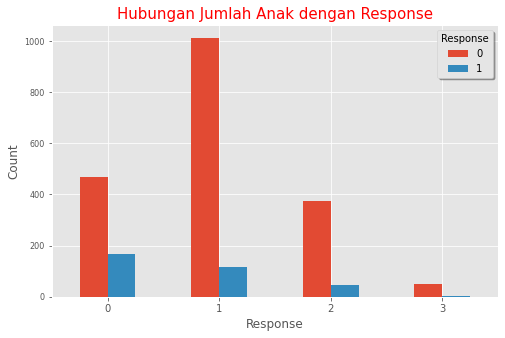

In [31]:
df.groupby(['child', 'Response'])['ID'].count().unstack().plot(kind = 'bar', figsize=(8,5))
plt.title('Hubungan Jumlah Anak dengan Response', fontsize = 15, color = 'red')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation = 0, fontsize = 10)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Response')
plt.show()

In [32]:
df4 = df.groupby(['Response', 'child'])['ID'].count().unstack()

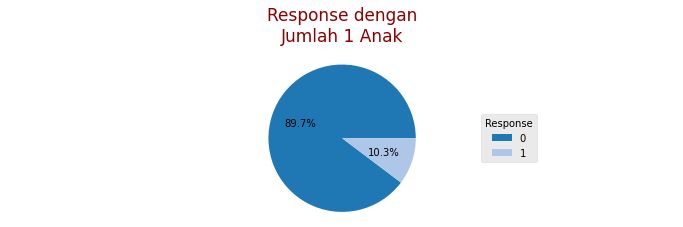

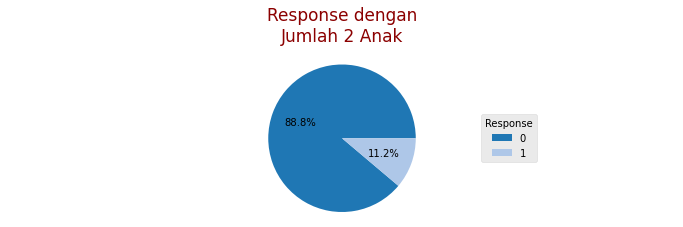

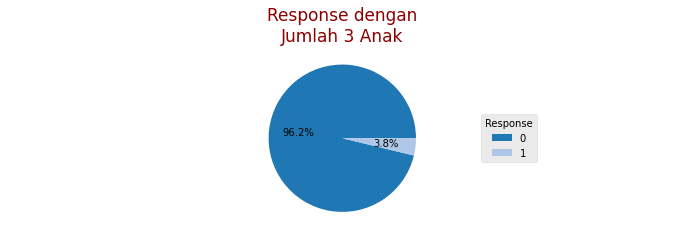

In [33]:
colors = plt.cm.tab20.colors


# Membuat diagram pie chart untuk setiap jenis kolom "durasi_stay"
for col in df4.columns[1:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(df4[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Response dengan\nJumlah {col} Anak', fontsize=17, pad=15, color = 'darkred')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               df4[col].index, 
               title='Response', 
               loc='center left', 
               bbox_to_anchor=(0.7, 0, 0.5, 1))
    plt.show()

In [34]:
df4 = df4.reset_index()

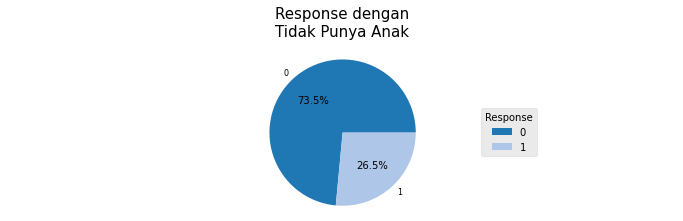

In [35]:
plt.figure()
plt.pie(df4[0], labels=df4['Response'], autopct='%1.1f%%',  colors=colors)
plt.title(f'Response dengan\nTidak Punya Anak', fontsize = 15, pad = 15)
plt.axis('equal')
plt.legend(wedges, 
               df4['Response'].index, 
               title='Response', 
               loc='center left', 
               bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.show()

In [36]:
df['converate'].unique()

array([0.14285714, 0.        , 0.11111111, 0.33333333, 0.16666667,
       1.        , 0.2       , 0.25      , 0.125     , 0.5       ,
       0.1       ])

### Hubungan antara Jumlah Anak dengan Conversion Rate

In [37]:
#membuat fungsi conversion rate
def convrate_group(conv):
    if 0 <= conv <= 0.2:
        return 'Sangat rendah'
    elif 0.2 < conv <= 0.4:
        return 'Rendah'
    elif 0.4 < conv <= 0.6:
        return 'Sedang'
    elif 0.6 < conv <= 0.8:
        return 'Tinggi'
    else:
        return 'Sangat tinggi'
    
#apply
df['conv_rate'] = df['converate'].apply(convrate_group)
df['conv_rate']

0       Sangat rendah
1       Sangat rendah
2       Sangat rendah
3       Sangat rendah
4       Sangat rendah
            ...      
2235    Sangat rendah
2236    Sangat rendah
2237    Sangat rendah
2238    Sangat rendah
2239    Sangat rendah
Name: conv_rate, Length: 2240, dtype: object

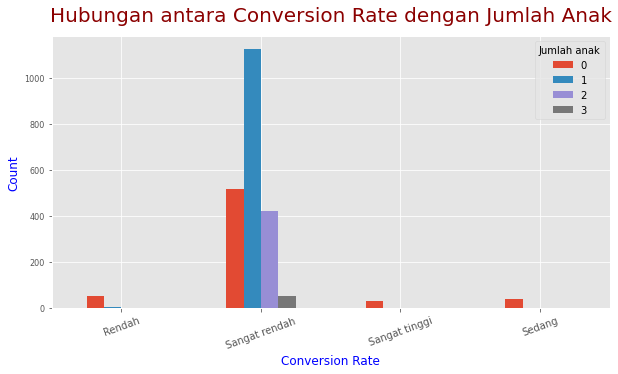

In [38]:
df.groupby(['conv_rate', 'child'])['ID'].count().unstack().plot(kind = 'bar', figsize = (10,5))
plt.title('Hubungan antara Conversion Rate dengan Jumlah Anak', fontsize = 20, color ='darkred', pad=15)
plt.xlabel('Conversion Rate', color = 'blue')
plt.ylabel('Count', color = 'blue')
plt.xticks(rotation = 20, fontsize = 10)
plt.legend(title = 'Jumlah anak', bbox_to_anchor=(1,1))
plt.show()

### Hubungan Conversion Rate dengan Status

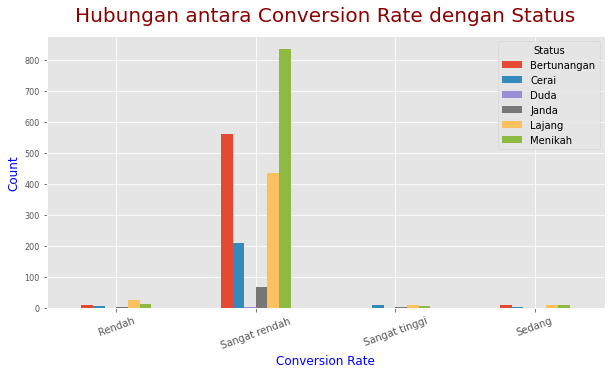

In [39]:
df.groupby(['conv_rate', 'Marital_Status'])['ID'].count().unstack().plot(kind = 'bar', figsize = (10,5))
plt.title('Hubungan antara Conversion Rate dengan Status', fontsize = 20, color ='darkred', pad=15)
plt.xlabel('Conversion Rate', color = 'blue')
plt.ylabel('Count', color = 'blue')
plt.xticks(rotation = 20, fontsize = 10)
plt.legend(title = 'Status', bbox_to_anchor=(1,1))
plt.show()

In [40]:
# Fungsi untuk mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" dan menghitung jumlah ID
def count_reservations_by_status(group):
    return group.groupby('Marital_Status')['ID'].count()

# Mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" serta menghitung jumlah ID
df6 = df.groupby('conv_rate').apply(count_reservations_by_status).unstack().fillna(0)

In [41]:
df6 = df6.reset_index()
df6

Marital_Status,conv_rate,Bertunangan,Cerai,Duda,Janda,Lajang,Menikah
0,Rendah,9.0,8.0,0.0,3.0,26.0,13.0
1,Sangat rendah,560.0,210.0,3.0,69.0,436.0,833.0
2,Sangat tinggi,1.0,9.0,0.0,3.0,10.0,7.0
3,Sedang,10.0,5.0,0.0,2.0,12.0,11.0


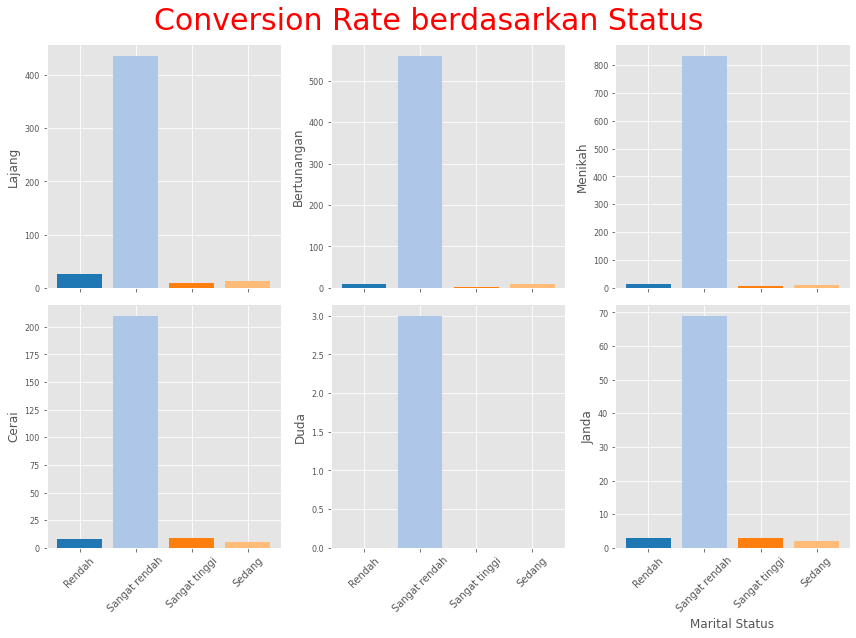

In [42]:
# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(12, 9), sharex=True)
colors = plt.cm.tab20.colors

# Bar chart for Canceled reservations
axes[0,0].bar(df6['conv_rate'], df6['Lajang'], color=colors)
axes[0,0].set_ylabel('Lajang', fontsize=12)
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Check-Out reservations
axes[0,1].bar(df6['conv_rate'], df6['Bertunangan'], color=colors)
axes[0,1].set_ylabel('Bertunangan', fontsize=12)
axes[0,1].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[0,2].bar(df6['conv_rate'], df6['Menikah'], color=colors)
axes[0,2].set_ylabel('Menikah', fontsize=12)
axes[0,2].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Canceled reservations
axes[1,0].bar(df6['conv_rate'], df6['Cerai'], color=colors)
axes[1,0].set_ylabel('Cerai', fontsize=12)
axes[1,0].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for Check-Out reservations
axes[1,1].bar(df6['conv_rate'], df6['Duda'], color=colors)
axes[1,1].set_ylabel('Duda', fontsize=12)
axes[1,1].tick_params(axis='x', rotation=45, labelsize=10)

# Bar chart for No-Show reservations
axes[1,2].bar(df6['conv_rate'], df6['Janda'], color=colors)
axes[1,2].set_ylabel('Janda', fontsize=12)
axes[1,2].tick_params(axis='x', rotation=45, labelsize=10)

# Set title and x-axis label
fig.suptitle('Conversion Rate berdasarkan Status', fontsize=30, color = 'red')
plt.xlabel('Marital Status', fontsize=12)

#plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Hubungan Antara Jenjang Pendidikan dengan Income

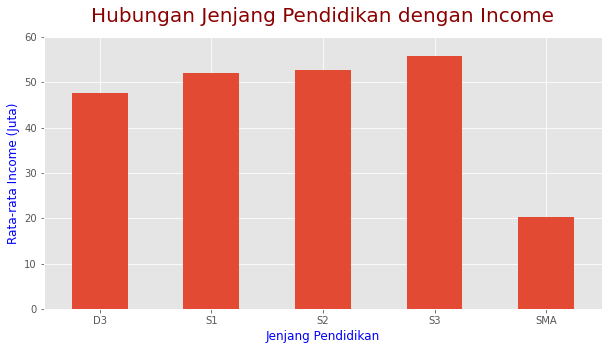

In [43]:
df.groupby(['Education'])['Income'].mean().plot(kind='bar', figsize = (10,5))
plt.title('Hubungan Jenjang Pendidikan dengan Income', fontsize = 20, color = 'darkred', pad = 15)
plt.xlabel('Jenjang Pendidikan', color = 'blue')
plt.xticks(rotation = 0, fontsize = 10)
plt.ylabel('Rata-rata Income (Juta)', color = 'blue')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int), fontsize = 10)
plt.show()

### Hubungan antara Jenjang Pendidikan dengan Jumlah Konsumsi

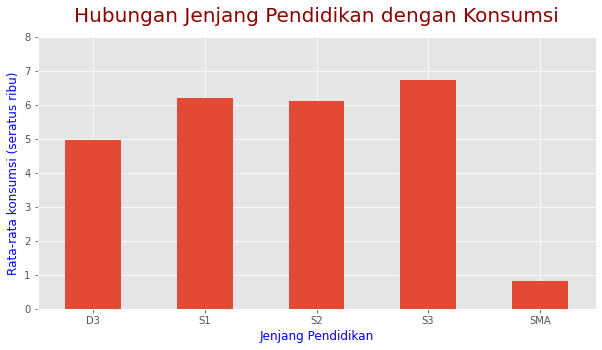

In [44]:
df.groupby(['Education'])['Contot'].mean().plot(kind='bar', figsize = (10,5))
plt.title('Hubungan Jenjang Pendidikan dengan Konsumsi', fontsize = 20, color = 'darkred', pad = 15)
plt.xlabel('Jenjang Pendidikan', color = 'blue')
plt.xticks(rotation = 0, fontsize = 10)
plt.ylabel('Rata-rata konsumsi (seratus ribu)', color = 'blue')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int), fontsize = 10)
plt.show()

### Hubungan antara Umur dengan Jumlah Konsumsi

#### Kategorikan Umur

In [45]:
df['Age'].min()

18.0

In [46]:
def Age_group (age):
    if age < 30:
        return 'muda'
    elif 30 <= age < 40:
        return 'menengah'
    elif 40 <= age < 50:
        return 'tua'
    else:
        return 'sangat tua'

df['age_group'] = df['Age'].apply(Age_group)
df['age_group']

0       sangat tua
1       sangat tua
2              tua
3         menengah
4         menengah
           ...    
2235           tua
2236    sangat tua
2237      menengah
2238    sangat tua
2239    sangat tua
Name: age_group, Length: 2240, dtype: object

#### Grouping Umur

In [47]:
df5 = df.groupby(['age_group'])['Contot'].mean()
df5

age_group
menengah      519597.845601
muda          609149.321267
sangat tua    710167.938931
tua           554375.739645
Name: Contot, dtype: float64

#### Visualisasi

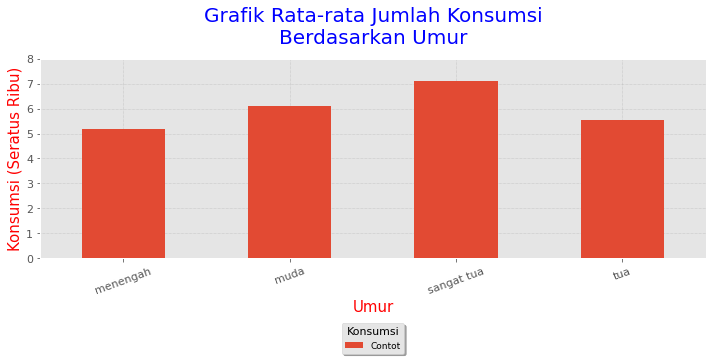

In [48]:
plt.figure(figsize=(19,7))
#membuat kerangka grafik
df5.plot(kind = 'bar')
plt.title('Grafik Rata-rata Jumlah Konsumsi\nBerdasarkan Umur', loc='center', pad=15, fontsize=20, color='blue')
plt.xlabel('Umur', fontsize = 15, color='red')
plt.ylabel('Konsumsi (Seratus Ribu)', fontsize=15, color='red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int), fontsize = 11)
plt.xticks(rotation = 20, fontsize = 11)
plt.legend(title='Konsumsi', loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()

### Hubungan antara Jumlah anggota keluarga dengan jumlah konsumsi

#### Grouping

In [49]:
df7 = df.groupby(['peopletot'])['Contot'].mean()
df7

peopletot
1    1.105402e+06
2    7.850393e+05
3    4.405737e+05
4    2.488472e+05
5    3.085312e+05
Name: Contot, dtype: float64

#### Visualisasi

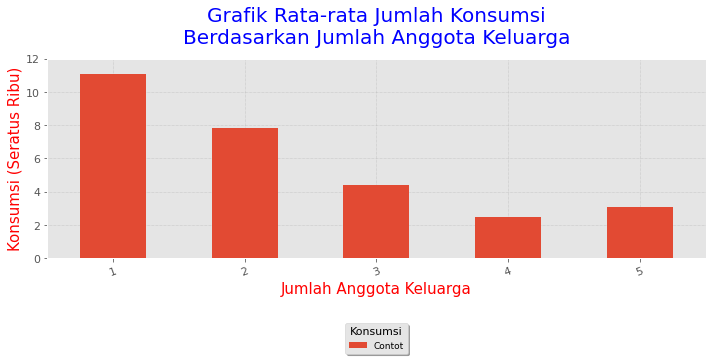

In [50]:
plt.figure(figsize=(19,7))
#membuat kerangka grafik
df7.plot(kind = 'bar')
plt.title('Grafik Rata-rata Jumlah Konsumsi\nBerdasarkan Jumlah Anggota Keluarga', loc='center', pad=15, fontsize=20, color='blue')
plt.xlabel('Jumlah Anggota Keluarga', fontsize = 15, color='red')
plt.ylabel('Konsumsi (Seratus Ribu)', fontsize=15, color='red')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/100000).astype(int), fontsize = 11)
plt.xticks(rotation = 20, fontsize = 11)
plt.legend(title='Konsumsi', loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.show()

### Hubungan antara Jumlah Anggota Keluarga Dengan Response

In [51]:
# Fungsi untuk mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" dan menghitung jumlah ID
def count_peopletot(group):
    return group.groupby('Response')['ID'].count()

# Mengelompokkan data berdasarkan "durasi_stay" dan "reservation_status" serta menghitung jumlah ID
df8 = df.groupby('peopletot').apply(count_peopletot).fillna(0)
df8 = df8.reset_index()
df8

Response,peopletot,0,1
0,1,152,102
1,2,648,116
2,3,798,91
3,4,277,24
4,5,31,1


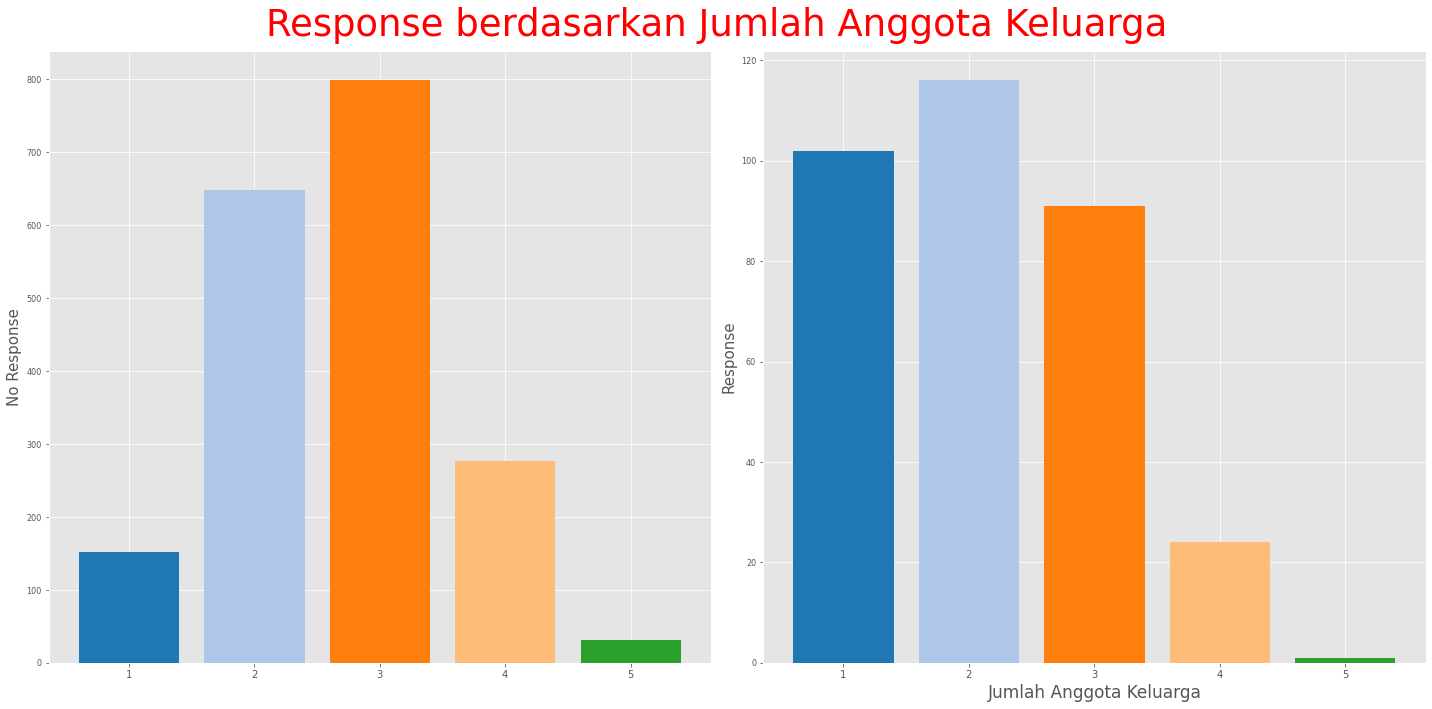

In [52]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)
colors = plt.cm.tab20.colors

# Bar chart for Canceled reservations
axes[0].bar(df8['peopletot'], df8[0], color=colors)
axes[0].set_ylabel('No Response', fontsize=15)
axes[0].tick_params(axis='x', rotation=0, labelsize=10)

# Bar chart for Check-Out reservations
axes[1].bar(df8['peopletot'], df8[1], color=colors)
axes[1].set_ylabel('Response', fontsize=15)
axes[1].tick_params(axis='x', rotation=0, labelsize=10)

# Set title and x-axis label
fig.suptitle('Response berdasarkan Jumlah Anggota Keluarga', fontsize=37, color = 'red')
plt.xlabel('Jumlah Anggota Keluarga', fontsize=17)

#plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [53]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'parentot',
       'AcceptedCmptot', 'Purctot', 'Contot', 'Age', 'converate',
       'Customer_Months', 'child', 'peopletot', 'conv_rate', 'age_group'],
      dtype='object')

In [54]:
dfnew2 = df[['Income', 'Dt_Customer', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Response',
             'parentot', 'AcceptedCmptot', 'Purctot', 'Contot', 'Customer_Months',
             'child', 'peopletot', 'conv_rate', 'Education', 'Marital_Status', 'age_group', 'MntCoke', 'MntFruits',
             'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases']]

## Encoding

In [55]:
# label encoder pada Education
df['Education'] = df['Education'].astype('category').cat.codes
# label encoder pada conv_rate
df['conv_rate'] = df['conv_rate'].astype('category').cat.codes

# one hot encoding pada marital status karena tidak memiliki urutan
status_onehot = pd.get_dummies(df['Marital_Status'], prefix='Status')
df = df.join(status_onehot)
status_onehot

,Status_Bertunangan,Status_Cerai,Status_Duda,Status_Janda,Status_Lajang,Status_Menikah
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
2235,0,0,0,0,0,1
2236,1,0,0,0,0,0
2237,0,1,0,0,0,0
2238,1,0,0,0,0,0


In [56]:
df['conv_rate']

0       1
1       1
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    1
2238    1
2239    1
Name: conv_rate, Length: 2240, dtype: int8

In [57]:
df['Education']

0       1
1       1
2       1
3       1
4       3
       ..
2235    1
2236    3
2237    1
2238    2
2239    3
Name: Education, Length: 2240, dtype: int8

## Drop Kolom yang tidak digunakan selanjutnya

In [58]:
dfnew = df.drop(columns=['ID','Marital_Status', 'Dt_Customer', 'Z_CostContact', 'MntCoke', 'MntFruits', 
                         'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                         'Z_Revenue', 'parentot', 'age_group', 'Year_Birth', 'Complain', 'NumDealsPurchases',
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']).copy()

In [59]:
dfnew.columns

Index(['Unnamed: 0', 'Education', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Response', 'AcceptedCmptot', 'Purctot', 'Contot', 'Age', 'converate',
       'Customer_Months', 'child', 'peopletot', 'conv_rate',
       'Status_Bertunangan', 'Status_Cerai', 'Status_Duda', 'Status_Janda',
       'Status_Lajang', 'Status_Menikah'],
      dtype='object')

In [60]:
dfnew

,Unnamed: 0,Education,Income,Recency,NumWebVisitsMonth,Response,AcceptedCmptot,Purctot,Contot,Age,...,Customer_Months,child,peopletot,conv_rate,Status_Bertunangan,Status_Cerai,Status_Duda,Status_Janda,Status_Lajang,Status_Menikah
0,0,1,58138000.0,58,7,1,0,25,1617000,57.0,...,32,0,1,1,0,0,0,0,1,0
1,1,1,46344000.0,38,5,0,0,6,27000,60.0,...,4,2,3,1,0,0,0,0,1,0
2,2,1,71613000.0,26,4,0,0,21,776000,49.0,...,16,0,2,1,1,0,0,0,0,0
3,3,1,26646000.0,26,6,0,0,8,53000,30.0,...,2,1,3,1,1,0,0,0,0,0
4,4,3,58293000.0,94,5,0,0,19,422000,33.0,...,11,1,3,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,1,61223000.0,46,5,0,0,18,1341000,47.0,...,18,1,3,1,0,0,0,0,0,1
2236,2236,3,64014000.0,56,7,0,1,22,444000,68.0,...,2,3,5,1,1,0,0,0,0,0
2237,2237,1,56981000.0,91,6,0,1,19,1241000,33.0,...,11,0,1,1,0,1,0,0,0,0
2238,2238,2,69245000.0,8,3,0,0,23,843000,58.0,...,11,1,3,1,1,0,0,0,0,0


## Scaling

In [61]:
scaler = StandardScaler()

In [62]:
# Method 2: Modify the existing DataFrame in place
dfnew[dfnew.columns] = scaler.fit_transform(dfnew[dfnew.columns])

In [63]:
dfnew

,Unnamed: 0,Education,Income,Recency,NumWebVisitsMonth,Response,AcceptedCmptot,Purctot,Contot,Age,...,Customer_Months,child,peopletot,conv_rate,Status_Bertunangan,Status_Cerai,Status_Duda,Status_Janda,Status_Lajang,Status_Menikah
0,-1.731278,-0.579850,0.299651,0.307039,0.693904,2.388846,-0.439037,1.320826,1.679417,1.007064,...,1.944060,-1.264505,-1.759115,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,1.904757,-0.792406
1,-1.729731,-0.579850,-0.263808,-0.383664,-0.130463,-0.418612,-0.439037,-1.154596,-0.961275,1.261969,...,-1.718864,1.396361,0.446548,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,1.904757,-0.792406
2,-1.728185,-0.579850,0.943420,-0.798086,-0.542647,-0.418612,-0.439037,0.799685,0.282673,0.327318,...,-0.149040,-1.264505,-0.656283,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406
3,-1.726638,-0.579850,-1.204881,-0.798086,0.281720,-0.418612,-0.439037,-0.894025,-0.918094,-1.287080,...,-1.980502,0.065928,0.446548,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406
4,-1.725092,1.416866,0.307056,1.550305,-0.130463,-0.418612,-0.439037,0.539114,-0.305254,-1.032175,...,-0.803133,0.065928,0.446548,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,-0.525001,1.261980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.725092,-0.579850,0.447037,-0.107383,-0.130463,-0.418612,-0.439037,0.408829,1.221032,0.157381,...,0.112598,0.065928,0.446548,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,-0.525001,1.261980
2236,1.726638,1.416866,0.580377,0.237969,0.693904,-0.418612,1.035390,0.929970,-0.268717,1.941715,...,-1.980502,2.726794,2.652211,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406
2237,1.728185,-0.579850,0.244375,1.446700,0.281720,-0.418612,1.035390,0.539114,1.054951,-1.032175,...,-0.803133,-1.264505,-1.759115,-0.068448,-0.591099,2.941967,-0.036621,-0.188676,-0.525001,-0.792406
2238,1.729731,0.418508,0.830288,-1.419719,-0.954831,-0.418612,-0.439037,1.060255,0.393948,1.092032,...,-0.803133,0.065928,0.446548,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406


## Clustering

### Menentukan Jumlah Cluster

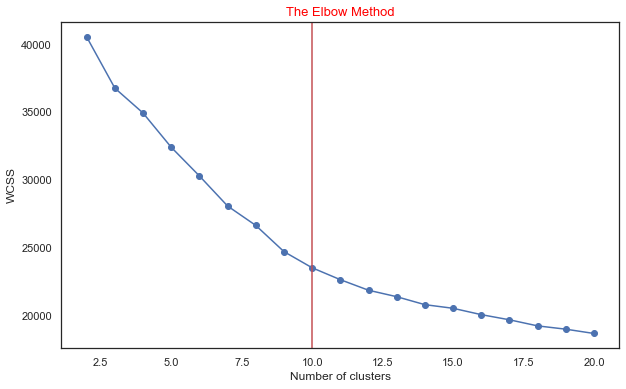

In [64]:
# membuat fungsi Elbow Method
sns.set_theme('notebook', style='white')
def elbowMethod(dfnew, k_min=2, k_max= 20):
    wcss = [] # Within Cluster Sum of Squares
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(dfnew)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(k_range, wcss, marker='o')

    plt.axvline(x = 10, color = 'r')
    plt.title('The Elbow Method', fontsize = 13, color = 'red')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
elbowMethod(dfnew)

### Melakukan Clustering

ditentukan kalau jumlah cluster adalah 13

In [65]:
kmeans = KMeans(n_clusters = 10, random_state = 42).fit(dfnew)
labels = kmeans.labels_

In [66]:
score = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=42)
    kmeans.fit(dfnew)
    score.append(kmeans.inertia_)

print('n-cluster = 10')
print()
hasilcl = dfnew.copy()
hasilcl['kmeans_10cluster'] = labels
print('Cluster and its customers quantity :')
display(hasilcl.kmeans_10cluster.value_counts(ascending=True))
display(hasilcl)

n-cluster = 10

Cluster and its customers quantity :


6      3
3     70
7     71
5    118
2    207
4    227
0    321
9    348
8    349
1    526
Name: kmeans_10cluster, dtype: int64

,Unnamed: 0,Education,Income,Recency,NumWebVisitsMonth,Response,AcceptedCmptot,Purctot,Contot,Age,...,child,peopletot,conv_rate,Status_Bertunangan,Status_Cerai,Status_Duda,Status_Janda,Status_Lajang,Status_Menikah,kmeans_10cluster
0,-1.731278,-0.579850,0.299651,0.307039,0.693904,2.388846,-0.439037,1.320826,1.679417,1.007064,...,-1.264505,-1.759115,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,1.904757,-0.792406,5
1,-1.729731,-0.579850,-0.263808,-0.383664,-0.130463,-0.418612,-0.439037,-1.154596,-0.961275,1.261969,...,1.396361,0.446548,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,1.904757,-0.792406,9
2,-1.728185,-0.579850,0.943420,-0.798086,-0.542647,-0.418612,-0.439037,0.799685,0.282673,0.327318,...,-1.264505,-0.656283,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,4
3,-1.726638,-0.579850,-1.204881,-0.798086,0.281720,-0.418612,-0.439037,-0.894025,-0.918094,-1.287080,...,0.065928,0.446548,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,0
4,-1.725092,1.416866,0.307056,1.550305,-0.130463,-0.418612,-0.439037,0.539114,-0.305254,-1.032175,...,0.065928,0.446548,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,-0.525001,1.261980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.725092,-0.579850,0.447037,-0.107383,-0.130463,-0.418612,-0.439037,0.408829,1.221032,0.157381,...,0.065928,0.446548,-0.068448,-0.591099,-0.339909,-0.036621,-0.188676,-0.525001,1.261980,8
2236,1.726638,1.416866,0.580377,0.237969,0.693904,-0.418612,1.035390,0.929970,-0.268717,1.941715,...,2.726794,2.652211,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,0
2237,1.728185,-0.579850,0.244375,1.446700,0.281720,-0.418612,1.035390,0.539114,1.054951,-1.032175,...,-1.264505,-1.759115,-0.068448,-0.591099,2.941967,-0.036621,-0.188676,-0.525001,-0.792406,2
2238,1.729731,0.418508,0.830288,-1.419719,-0.954831,-0.418612,-0.439037,1.060255,0.393948,1.092032,...,0.065928,0.446548,-0.068448,1.691765,-0.339909,-0.036621,-0.188676,-0.525001,-0.792406,4


In [67]:
dfnew2 = dfnew2.join(hasilcl['kmeans_10cluster'])
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntCoke,MntFruits,...,child,peopletot,conv_rate,age_group,Status_Bertunangan,Status_Cerai,Status_Duda,Status_Janda,Status_Lajang,Status_Menikah
0,0,5524,1957,1,Lajang,58138000.0,2012-04-09,58,635000,88000,...,0,1,1,sangat tua,0,0,0,0,1,0
1,1,2174,1954,1,Lajang,46344000.0,2014-08-03,38,11000,1000,...,2,3,1,sangat tua,0,0,0,0,1,0
2,2,4141,1965,1,Bertunangan,71613000.0,2013-08-21,26,426000,49000,...,0,2,1,tua,1,0,0,0,0,0
3,3,6182,1984,1,Bertunangan,26646000.0,2014-10-02,26,11000,4000,...,1,3,1,menengah,1,0,0,0,0,0
4,4,5324,1981,3,Menikah,58293000.0,2014-01-19,94,173000,43000,...,1,3,1,menengah,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,1,Menikah,61223000.0,2013-06-13,46,709000,43000,...,1,3,1,tua,0,0,0,0,0,1
2236,2236,4001,1946,3,Bertunangan,64014000.0,2014-10-06,56,406000,0,...,3,5,1,sangat tua,1,0,0,0,0,0
2237,2237,7270,1981,1,Cerai,56981000.0,2014-01-25,91,908000,48000,...,0,1,1,menengah,0,1,0,0,0,0
2238,2238,8235,1956,2,Bertunangan,69245000.0,2014-01-24,8,428000,30000,...,1,3,1,sangat tua,1,0,0,0,0,0


In [68]:
dfnew2.columns

Index(['Income', 'Dt_Customer', 'Recency', 'NumWebVisitsMonth', 'Complain',
       'Response', 'parentot', 'AcceptedCmptot', 'Purctot', 'Contot',
       'Customer_Months', 'child', 'peopletot', 'conv_rate', 'Education',
       'Marital_Status', 'age_group', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'kmeans_10cluster'],
      dtype='object')

In [69]:
numeric1 = dfnew2[['Purctot', 'Customer_Months', 'Recency', 'kmeans_10cluster']]
numeric2 = dfnew2[['Income', 'Contot', 'kmeans_10cluster']]
numeric3 = dfnew2[['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntCoke', 'MntFruits',
                   'MntGoldProds','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','kmeans_10cluster']]
numeric4 = dfnew2[['parentot', 'child', 'peopletot', 'kmeans_10cluster']]
numeric5 = dfnew2[['Response', 'AcceptedCmptot', 'conv_rate', 'kmeans_10cluster']]
nonumeric = dfnew2[['Education', 'Marital_Status', 'age_group', 'kmeans_10cluster']]

In [70]:
#mencari modus untuk non numeric data
nonumericgroup = nonumeric.groupby('kmeans_10cluster').apply(lambda x: x.mode().iloc[0])
nonumericgroup

,Education,Marital_Status,age_group,kmeans_10cluster
kmeans_10cluster,,,,
0,S1,Bertunangan,sangat tua,0.0
1,S1,Menikah,tua,1.0
2,S1,Cerai,sangat tua,2.0
3,S1,Lajang,sangat tua,3.0
4,S1,Bertunangan,sangat tua,4.0
5,S1,Lajang,sangat tua,5.0
6,S1,Duda,muda,6.0
7,S1,Janda,sangat tua,7.0
8,S1,Menikah,sangat tua,8.0


### Visualisasi Untuk Interpretasi

In [71]:
numericgroup = numeric1.groupby('kmeans_10cluster').mean()
numericgroup

,Purctot,Customer_Months,Recency
kmeans_10cluster,,,
0,9.800623,17.158879,50.838006
1,10.627376,16.733840,47.714829
2,14.608696,17.328502,50.048309
3,19.785714,16.100000,39.457143
4,20.911894,17.110132,51.308370
5,21.567797,21.838983,38.610169
6,13.333333,7.000000,30.333333
7,16.521127,17.084507,48.492958
8,21.621777,16.702006,53.965616


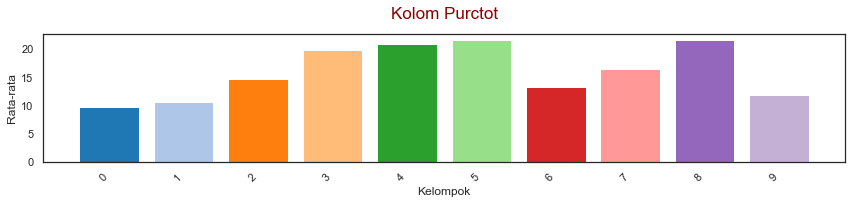

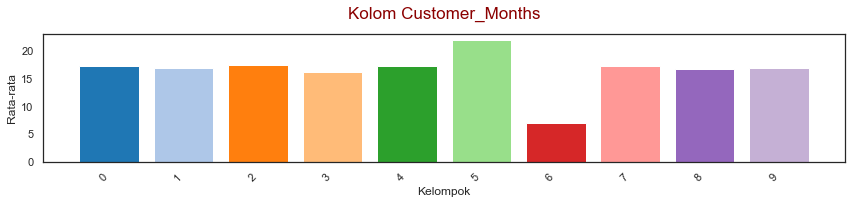

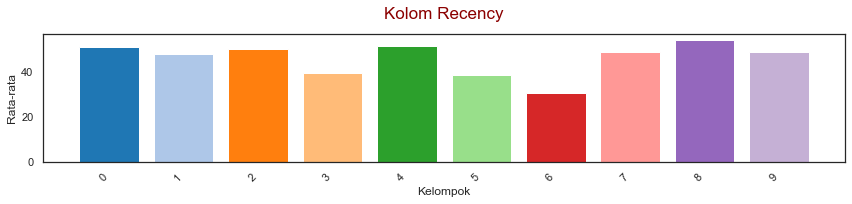

In [72]:
for col in numericgroup.columns[0:]:
    plt.figure()
    x_labels = numericgroup[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, numericgroup[col], color=colors)

    plt.title(f'Kolom {col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('Kelompok')
    plt.ylabel('Rata-rata')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
    
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()

In [73]:
numeric2group = numeric2.groupby('kmeans_10cluster').mean()
numeric2group

,Income,Contot
kmeans_10cluster,,
0,3.708246e+07,1.611308e+05
1,3.886077e+07,1.955532e+05
2,4.955677e+07,5.113237e+05
3,8.295956e+07,1.630286e+06
4,6.984544e+07,1.104410e+06
5,7.231409e+07,1.388602e+06
6,4.378900e+07,2.566667e+05
7,5.495487e+07,6.795634e+05
8,7.180290e+07,1.192453e+06


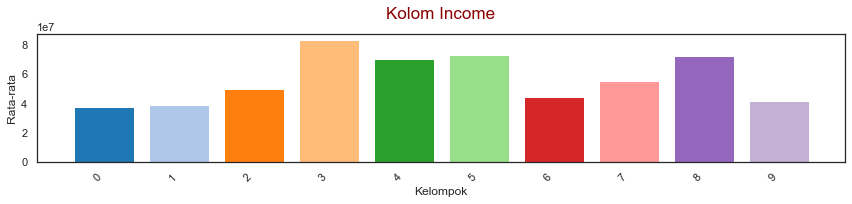

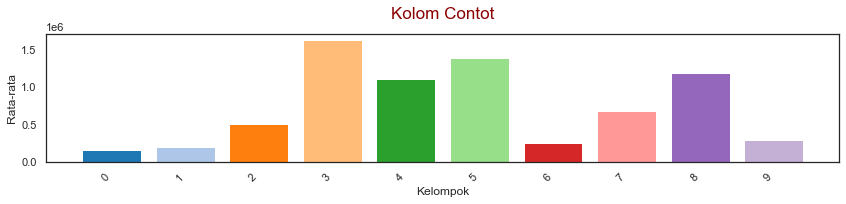

In [74]:
for col in numeric2group.columns[0:]:
    plt.figure()
    x_labels = numeric2group[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, numeric2group[col], color=colors)

    plt.title(f'Kolom {col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('Kelompok')
    plt.ylabel('Rata-rata')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
    
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()

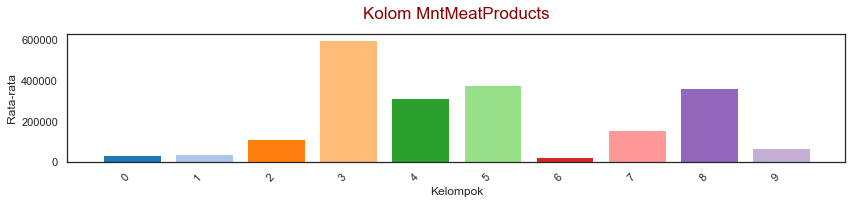

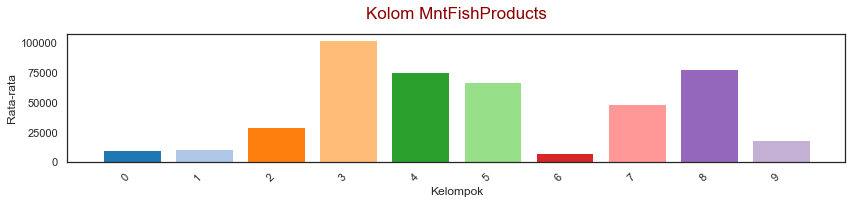

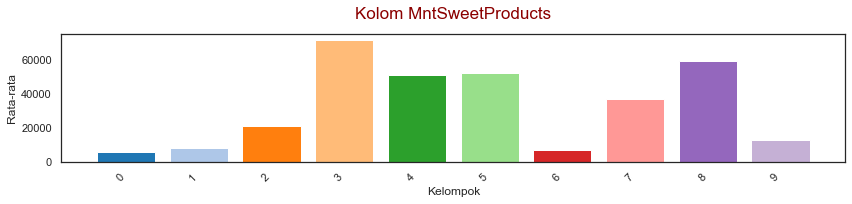

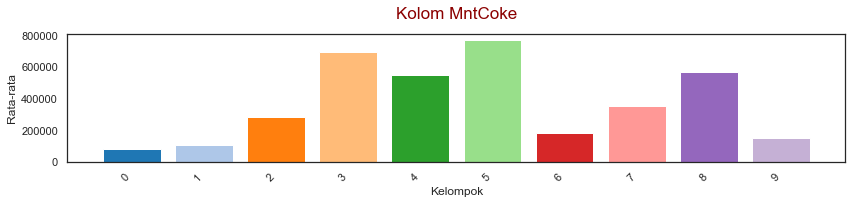

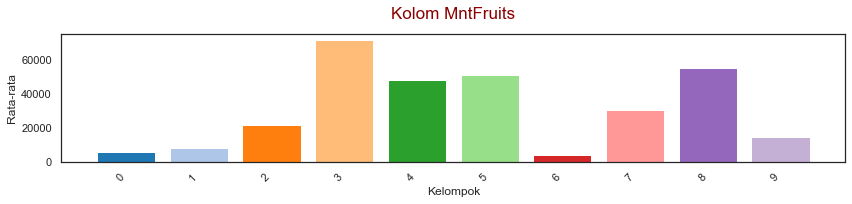

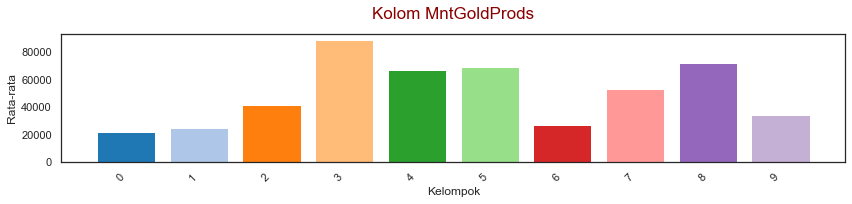

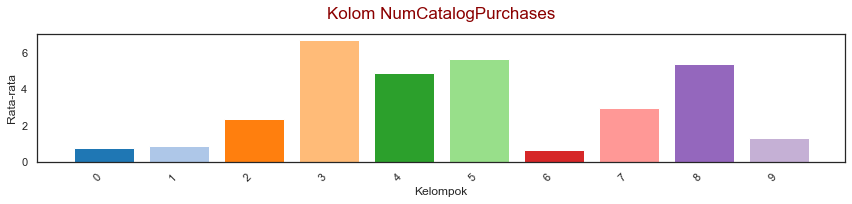

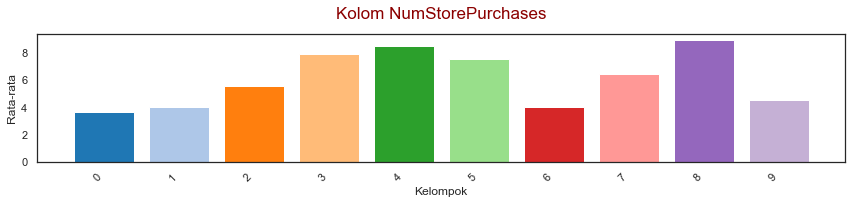

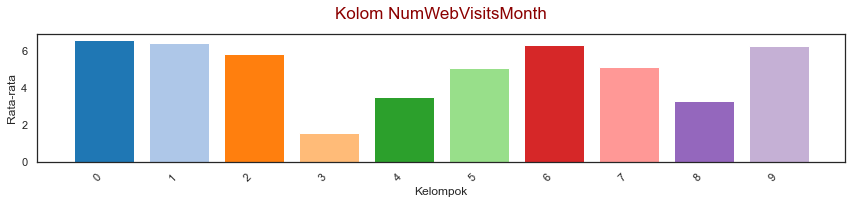

In [76]:
numeric3group = numeric3.groupby('kmeans_10cluster').mean()

for col in numeric3group.columns[0:9]:
    plt.figure()
    x_labels = numeric3group[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, numeric3group[col], color=colors)

    plt.title(f'Kolom {col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('Kelompok')
    plt.ylabel('Rata-rata')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
    
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()


In [ ]:
numeric4group = numeric4.groupby('kmeans_10cluster').mean()

for col in numeric4group.columns[0:]:
    plt.figure()
    x_labels = numeric4group[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, numeric4group[col], color=colors)
    plt.title(f'Kolom {col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('Kelompok')
    plt.ylabel('Rata-rata')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
     
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()

In [ ]:
numeric5group = numeric5.groupby('kmeans_10cluster').mean()

for col in numeric5group.columns[0:]:
    plt.figure()
    x_labels = numeric5group[col].index
    x_pos = range(len(x_labels))
    
    plt.bar(x_pos, numeric5group[col], color=colors)
    plt.title(f'Kolom {col}', fontsize=17, pad=15, color='darkred')
    plt.xlabel('Kelompok')
    plt.ylabel('Rata-rata')
    
    # Customize the x-axis tick labels
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')
     
    plt.tight_layout()  # To make sure the labels fit properly
    plt.show()

### Validasi

In [ ]:
silhouette_avg = silhouette_score(dfnew, labels)
print("Silhouette score:", silhouette_avg)